## Decision Trees and Random Forests

In [13]:
# %load ~/Coding/Udemy/Python3_Data_Science_And_Machine_Learning/imports
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

#Config Seaborn
sns.set(style="ticks", color_codes=True)

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')



## Decision Trees  

https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991

**Decision trees** are a type of model used for both *Classification* and *Regression*.   
Trees answer sequential questions which send us down a certain route of the tree given the answer. The model behaves with “if this than that” conditions ultimately yielding a specific result. 

This is easy to see with the image below which maps out whether or not to play golf.

![decision tree](https://cdn-images-1.medium.com/max/1600/1*dTCdSK0QoC7RndDo1eIrDg.png)


Tree depth is an important concept. This represents how many questions are asked before we reach our predicted classification. We can see that the deepest the tree gets in the example above is two. The sunny and rainy routes both have a depth of two. The overcast route only has a depth of one, although the overall tree depth is denoted by its longest route. Thus, this tree has a depth of two.

**Advantages to using decision trees:**

1. Easy to interpret and make for straightforward visualizations.  
2. The internal workings are capable of being observed and thus make it possible to reproduce work.  
3. Can handle both numerical and categorical data.  
4. Perform well on large datasets  
5. Are extremely fast  

**Disadvantages of decision trees:**

1. Building decision trees require algorithms capable of determining an optimal choice at each node. One popular algorithm is the *Hunt’s algorithm*. This is a greedy model, meaning it makes the most optimal decision at each step, but does not take into account the global optimum. What does this mean? At each step the algorithm chooses the best result. However, choosing the best result at a given step does not ensure you will be headed down the route that will lead to the optimal decision when you make it to the final node of the tree, called the leaf node.  
2. Decision trees are prone to overfitting, especially when a tree is particularly deep. This is due to the amount of specificity we look at leading to smaller sample of events that meet the previous assumptions. This small sample could lead to unsound conclusions. 

Ideally, we would like to minimize both error due to bias and error due to variance. 

## Random Forests

A **random forest** is simply *a collection of decision trees* whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models.

*Random Forests reduce variance by:*
1. reduce variance is by training on different samples of the data. 
2. using a random subset of features. 

**Random Forests** are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.

----
The top of the tree is the **Root Node**. These connect to **Internal nodes** and **Leaf nodes** through **Branches**

Root Nodes have branches pointing away from them.  
Internal Nodes have branches feeding to them and away from them  
Leaf Nodes have branches pointing to them


-*each Internal (non-leaf) node denotes a test on an attribute*   
-*each branch represents the outcome of a test*  
-*each Leaf (or terminal) node holds a class label*.  

![interal and Leaf Nodes](https://www.researchgate.net/profile/Jose_Sa3/publication/303773171/figure/fig2/AS:391407152975874@1470330145270/a-describes-the-components-of-a-decision-tree-the-Nodes-represent-the-possible.png)


----  

https://www.youtube.com/watch?v=7VeUPuFGJHk

If classifying data shows True Positives distributed inequally between True and False decision paths, they are all considered *impure*

to determine which separation is best you need a way to determine and compare *impurity*

One way is **Gini Impurity**
https://bambielli.com/til/2017-10-29-gini-impurity/#

 *Gini Impurity* is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.

gini == 1 - (the probability of yes^2) minus (the probability of no^2) 


-----

Some notes for later:
**Information Entropy and Information Gain**  
https://bambielli.com/til/2017-10-22-information-gain/#

**gini impurity (with examples) and Entropy**  
https://bambielli.com/til/2017-10-29-gini-impurity/#








### Back To Udemy
### Decision Trees  
Nodes and Edges

**Nodes** Split the value for a certain attribute  
**Edges** Outcome of a split to the next node

*Root Node* performs the first split  
*Leaf Node* terminal nodes that predict the outcome

----

**Intuition behind splitting classes**

Not all classes will split perfectly

Trying to choose the features that best split the data. 

The goal is *Maximizing Information Gain from Split*

**Entropy** and **Information Gain** are the mathematical methods of choosing the *Best Split*


### Random Forests  

Decision Trees don't tend to have the best *Predictive Accuracy*. This is due to High Variance: Different splits in the Training Data can lead to Different Trees. 

*Bagging* is a general purpose procedure for reducing the variance of machine learning method. Random Forests build off the idea of Bagging.

What we do in Random Forests is create an *ensemble* of Decision Trees using *Bootstrapped Samples* of the *Training Set*

*Bootstrapped Samples*  means Sampling From The Training Set with *Replacement*. 

To improve performance we can use many trees with a random sample of features chosen as the split.
*When building each tree:*  
- Each time a split is considered:
1. a random sample of *m* Features is chosen as a split candidate from the full set of *p* Features.  
2. The split is only allowed to use one of those *m* features. 

-A new random sample of features is taken for *Every Split* 
-For *Classification*, *m* is typically chosen to be the square root of *p*, where *p* is the full set of Features


**What's the point?**  
If there's One Very Strong Feature in the Dataset, when using *Bagged Trees* most of the trees will make that Feature as the top split. This results in an ensemble of trees that are *Highly Correlated*. 

 We want to avoid this because averaging Highly Correlated quantity does not significantly reduce variance. 
 
By randomly leaving out canidate Features from each split the Random Forest *DeCorrelates* these trees (making them independant of each other). This lets the averaging process reduce the variance of the resulting model. 




In [30]:
# Read In Data

df = pd.read_csv("kyphosis.csv")

## Kyphosis

A spinal condition. These represent patients that had the condition and had an operation. 

- The Absent or Present indicates whether the patient had the condition after the operation.
- Age is age of the patient in Months
- Number is Number of Vertebrae involved in the operation 
- Start is the number of the Topmost vertabrae that was operated on.




In [31]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


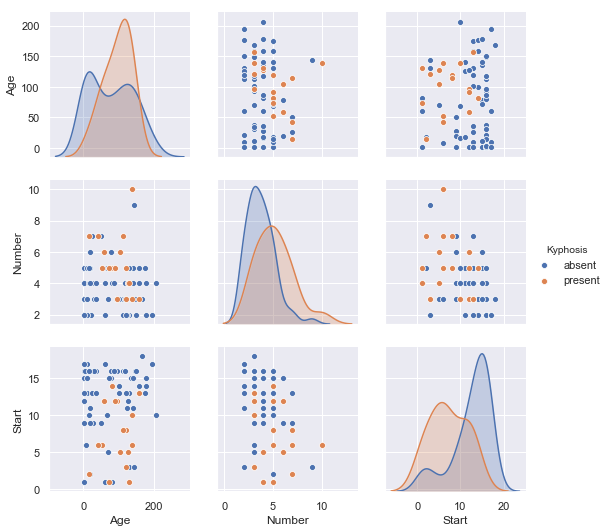

In [33]:
sns.pairplot(df, hue='Kyphosis')

In [35]:
# Set input vars
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

# The Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


**First Train a Single Decision Tree**

In [36]:
# import model
from sklearn.tree import DecisionTreeClassifier


In [37]:
# Create an instance of the DecisionTreeClassifier object
dtree = DecisionTreeClassifier()

**Default output from the .fit() should look something like**

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,  
            max_features=None, max_leaf_nodes=None,  
            min_impurity_decrease=0.0, min_impurity_split=None,  
            min_samples_leaf=1, min_samples_split=2,  
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,  
            splitter='best')  

In [40]:
# Fit the Data
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
# Make predictions
predictions = dtree.predict(X_test)

In [42]:
predictions

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

The f1-score gives you the harmonic mean of precision and recall. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.

The support is the number of samples of the true response that lie in that class. 

In [45]:
# Printing results
print('Classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

   micro avg       0.56      0.56      0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



Confusion Matrix
[[12  5]
 [ 6  2]]


### Compare these results using a Random Forest Model

In [46]:
# Import the Random Forest Classifier. Note that this is stored in 'ensemble'
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Instantiate the model object. Test different numbers of estimators to improve scores
rfc = RandomForestClassifier(n_estimators=200)

In [58]:
# Fit the Data
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
# Make predictions
rfcpred = rfc.predict(X_test)

In [60]:
# Printing results
print('Classification Report')
print(classification_report(y_test,rfcpred))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,rfcpred))

Classification Report
              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

   micro avg       0.76      0.76      0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



Confusion Matrix
[[17  0]
 [ 6  2]]


Notice that, in addition to the small dataset, that the Absent far outweighs Present. This leads to a Label Imbalance. 

In [61]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# Visualizing Decision Trees

In [68]:
# Need some new imports
# also need  pydot and graphviz installed
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

This was wonky to get working. 

Note the gini numbers included.

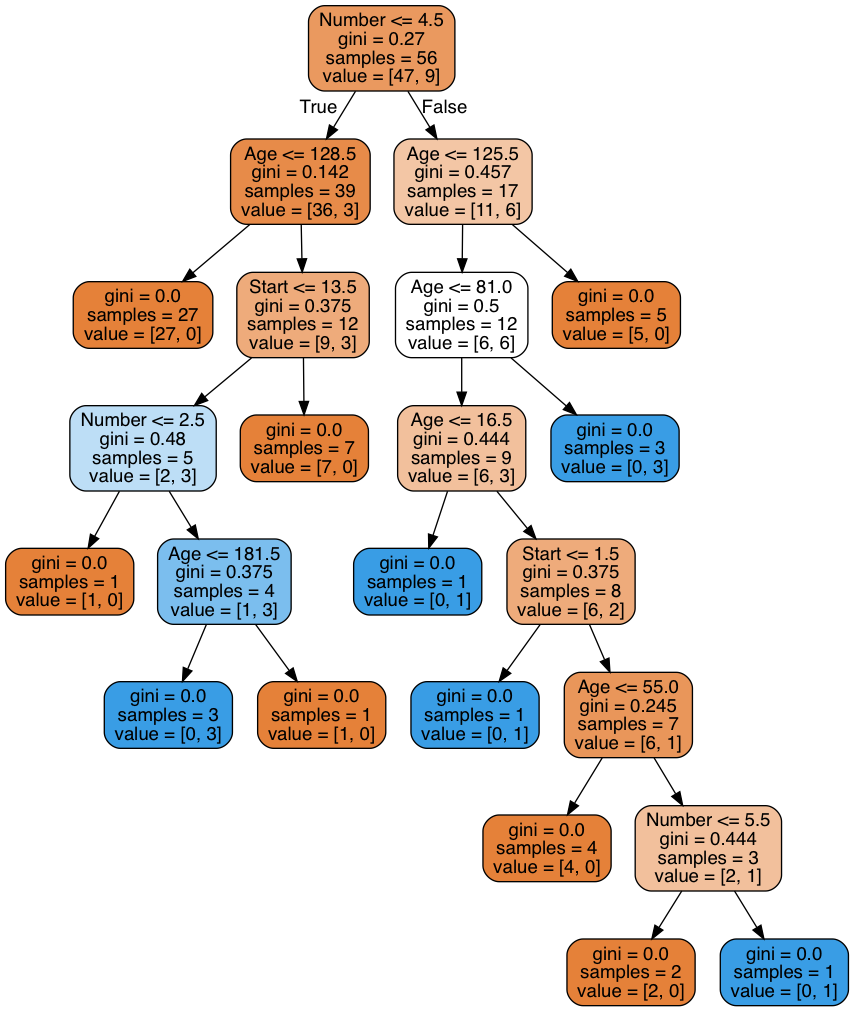

In [75]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())